# implementation of SVM classifier with the linear and the radial basis function (rbf) kernels.

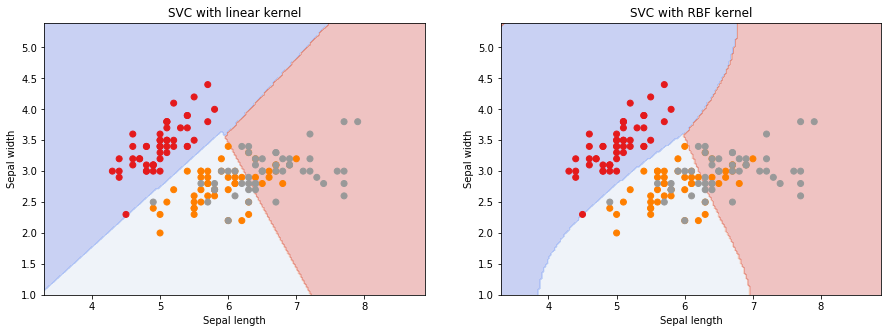

In [13]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features.
y = iris.target

# Plot resulting Support Vector boundaries with original data
# Create fake input data for prediction that we will use for plotting
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

# Create the SVC model object
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C, decision_function_shape='ovr').fit(X, y)
Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

# Create the SVC model object
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='rbf', C=C, decision_function_shape='ovr').fit(X, y)

Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)

plt.subplot(122)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')

plt.show()


#  grid search to calculate optimal hyper-parameters. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

# shuffle the dataset
X, y = shuffle(X, y, random_state=0)

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Set the parameters by cross-validation
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

print("# Tuning hyper-parameters")
print()

clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

# test our model on the test dataset and evaluate various classification metrics 

In [15]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.60      0.82      0.69        11
          2       0.83      0.62      0.71        16

avg / total       0.81      0.79      0.79        38


